# Table of contents
1. [Introduction](#introduction) 
2. [Step 1: Open data file & look at general info](#step_1)
    1. [Conclusion](#step_1_conclusion)
3. [Step 2: Data preprocessing](#step_2)
    1. [Make column names lowercase](#step_2_1)
    2. [Filling missing values](#step_2_2)
    3. [Changing data types](#step_2_3)
    4. [Summing sales for all regions](#step_2_4)
    5. [Conclusion](#step_2_5)
4. [Step 3: Analyze the data](#step_3)
    1. [Games released by year](#step_3_1)
        1. [Conclusion](#step_3_1_1)
    2. [Total sales by platform](#step_3_2)
        1. [Conclusion](#step_3_2_1)
    3. [Identifying relevant platforms](#step_3_3)
        1. [Conclusion](#step_3_3_1)
    4. [Boxplot of global sales by platform](#step_3_4)
        1. [Conclusion](#step_3_4_1)
    5. [Effects of reviews on Xbox One sales](#step_3_5)
        1. [Conclusion](#step_3_5_1)
    6. [Xbox One title sales vs other platforms](#step_3_6)
        1. [Conclusion](#step_3_6_1)
    7. [Grouping sales by genre](#step_3_7)
        1. [Conclusion](#step_3_7_1)
5. [Step 4: Create a user profile for each region](#step_4)
    1. [Regional top 5 platforms](#step_4_1)
        1. [Conclusion](#step_4_1_1)
    2. [Regional top 5 genres](#step_4_2)
        1. [Conclusion](#step_4_2_1)
    3. [Effects of ESRB rating on sales](#step_4_3)
        1. [Conclusion](#step_4_3_1)
6. [Step 5: Hypothesis testing](#step_5)
    1. [Average user ratings for Xbox One & PC  are the same](#step_5_1)
        1. [Conclusion](#step_5_1_1)
    2. [Average user ratings for action & sports titles are different](#step_5_2)
        1. [Conclusion](#step_5_2_1)
7. [Step 6: General conclusion](#step_6)
    1. [Full project overview](#step_6_1)
    2. [Recommendations & suggestions](#step_6_2)

# Video game market research <a name="introduction"></a>

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. 
(The important thing is to get experience working with data. It doesn’t really matter whether you’re forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game’s content and assigns an age rating such as Teen or Mature.

### Step 1: Open data file & study the general info <a name="step_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# try-except blocks handle errors that occur from changing file directories

try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [2]:
# print head for the new DataFrame

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# print some descriptive statistics for data

data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
# print general information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Conclusion <a name="step_1_conclusion"></a>

After our initial overview of the data, we can see there are a few problems that we should fix before proceeding.
- Column names contain uppercase characters. Best-practice guidelines dictate that these should all be changed to lowercase
- There are missing values in the **name**, **year_of_release**, **genre**, **critic_score**, **user_score**, and **rating** columns. We need to attempt to find out why these are missing, and decide whether or not to fill them in.
- **user_score** has non-numeric values labeled "tbd" which is an abbreviation for to "be determined". We need to address these.
- **year_of_release** should be changed to the *int64* data type in case we need to perform mathematical operations on the column further into the analysis
- **user_score** should be changed to the *float64* data type instead of *object* for the same reason as above

### Step 2: Data preprocessing <a name="step_2"></a>

#### Make column names lowercase <a name="step_2_1"></a>

In [5]:
# we can use a simple list comprehension for this task

data.columns = [column_name.lower() for column_name in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Filling missing values <a name="step_2_2"></a>

Some data for the **critic_score**, **user_score**, and **rating** columns is missing. We can't be certain why, but it could be because not all titles get rated by the ESRB. The ESRB was established in 1994, so any title released prior to 1994 will not have a rating. User scores and critic scores come from various groups like IGN, Metacritic, and Game Informer. Missing values for these scores could be because none of these groups decided to review the title.

In [6]:
# we'll drop the two rows with missing name & genre data

data = data[data['name'].notna()]

In [7]:
# we'll replace missing release year data with averages for each platform

platform_by_year = data.groupby('platform')['year_of_release'].mean().round()
year_means_dict = dict(zip(platform_by_year.index, platform_by_year.values))
data['year_of_release'] = data['year_of_release'].fillna(data['platform'].map(year_means_dict))

In [8]:
# fill "tbd" & NaN in the 'user_score', 'critic_score' columns with -1

data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
data['critic_score'].fillna(-1, inplace=True)
data['user_score'].fillna(-1, inplace=True)

In [9]:
# fill NaN in the 'rating' column with N/A

data['rating'].fillna('N/A', inplace=True)

We filled the "tbd" values an NaN values in the 'user_score' and 'critic_score' columns with -1 since it's better to fill NaN with a meaningful placeholder. This makes our code more resilient and our data less likely to be corrupted by a careless .dropna() operation.

#### Changing data types <a name="step_2_3"></a>

In [10]:
# change release year data to int64

data['year_of_release'] = data['year_of_release'].astype('int64')

In [11]:
# change user score data to float

data['user_score'] = data['user_score'].astype('float64')

#### Summing sales for all regions <a name="step_2_4"></a>

In [12]:
# add all sales together, create a new column, & reorder columns (put 'all_sales' with other sales data)

data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

cols = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
        'other_sales', 'all_sales', 'critic_score', 'user_score', 'rating']

data = data[cols]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1.0,-1.0,N/A
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1.0,-1.0,N/A


In [13]:
# check general info to see changes made

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   all_sales        16713 non-null  float64
 9   critic_score     16713 non-null  float64
 10  user_score       16713 non-null  float64
 11  rating           16713 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


#### Conclusion <a name="step_2_5"></a>
In this step, we achieved the following in order to prepare our raw data for an accurate and clean analysis:
- Column names changed to lowercase
- Dropped the two rows with missing name & genre data
- Replaced missing release year data with averages for each platform
- Filled "tbd" in the 'user_score' column with NaN
- Changed user score data to float
- Change drelease year data to int64
- Added all sales together in new column
- Reorder 'all_sales' columns

### Step 3: Analyze the data <a name="step_3"></a>

#### Games released per year <a name="step_3_1">

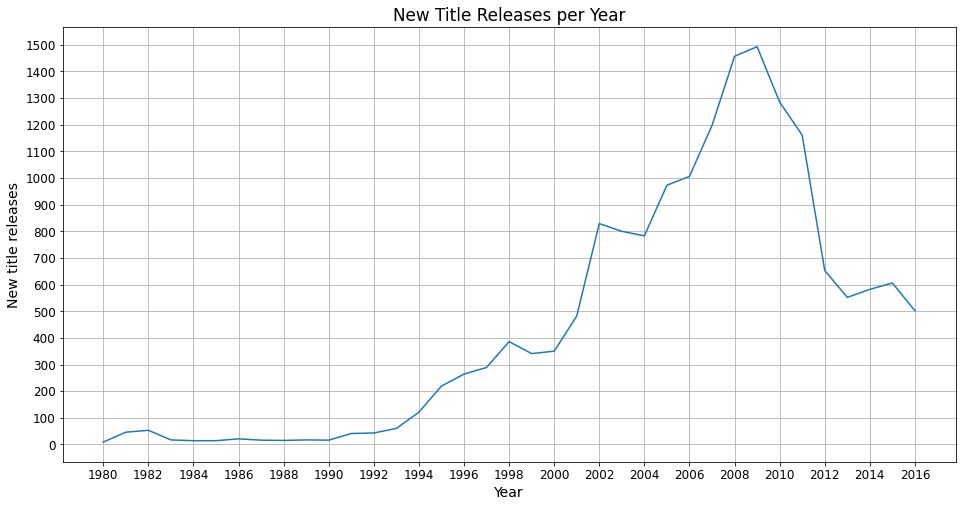

In [14]:
# plot graph of number of releases per year

plt.rcParams.update({'font.size': 14})

releases_per_year = data['year_of_release'].value_counts().sort_index(ascending=False)
releases_per_year.plot(title='New Title Releases per Year', ylabel='New title releases', xlabel='Year',
                       figsize=(16, 8), grid=True, xticks=range(1980, 2018, 2), yticks=range(0, 1600, 100),
                       fontsize=12)
plt.show()

##### Conclusion <a name="step_3_1_1">
It looks like there weren't many releases prior to 1993. After this point, there's rapid growth in the video game market up until 2008 - 2009. The number of releases fell sharply afterwards, perhaps due to the economic recession and economic slowdown caused by the 2008 financial crisis.

#### Total sales by platform <a name="step_3_2">

In [15]:
# top 10 platforms by total sales from 1980 to 2016

top_platforms_total_sales = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
top_platforms_total_sales.head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: all_sales, dtype: float64

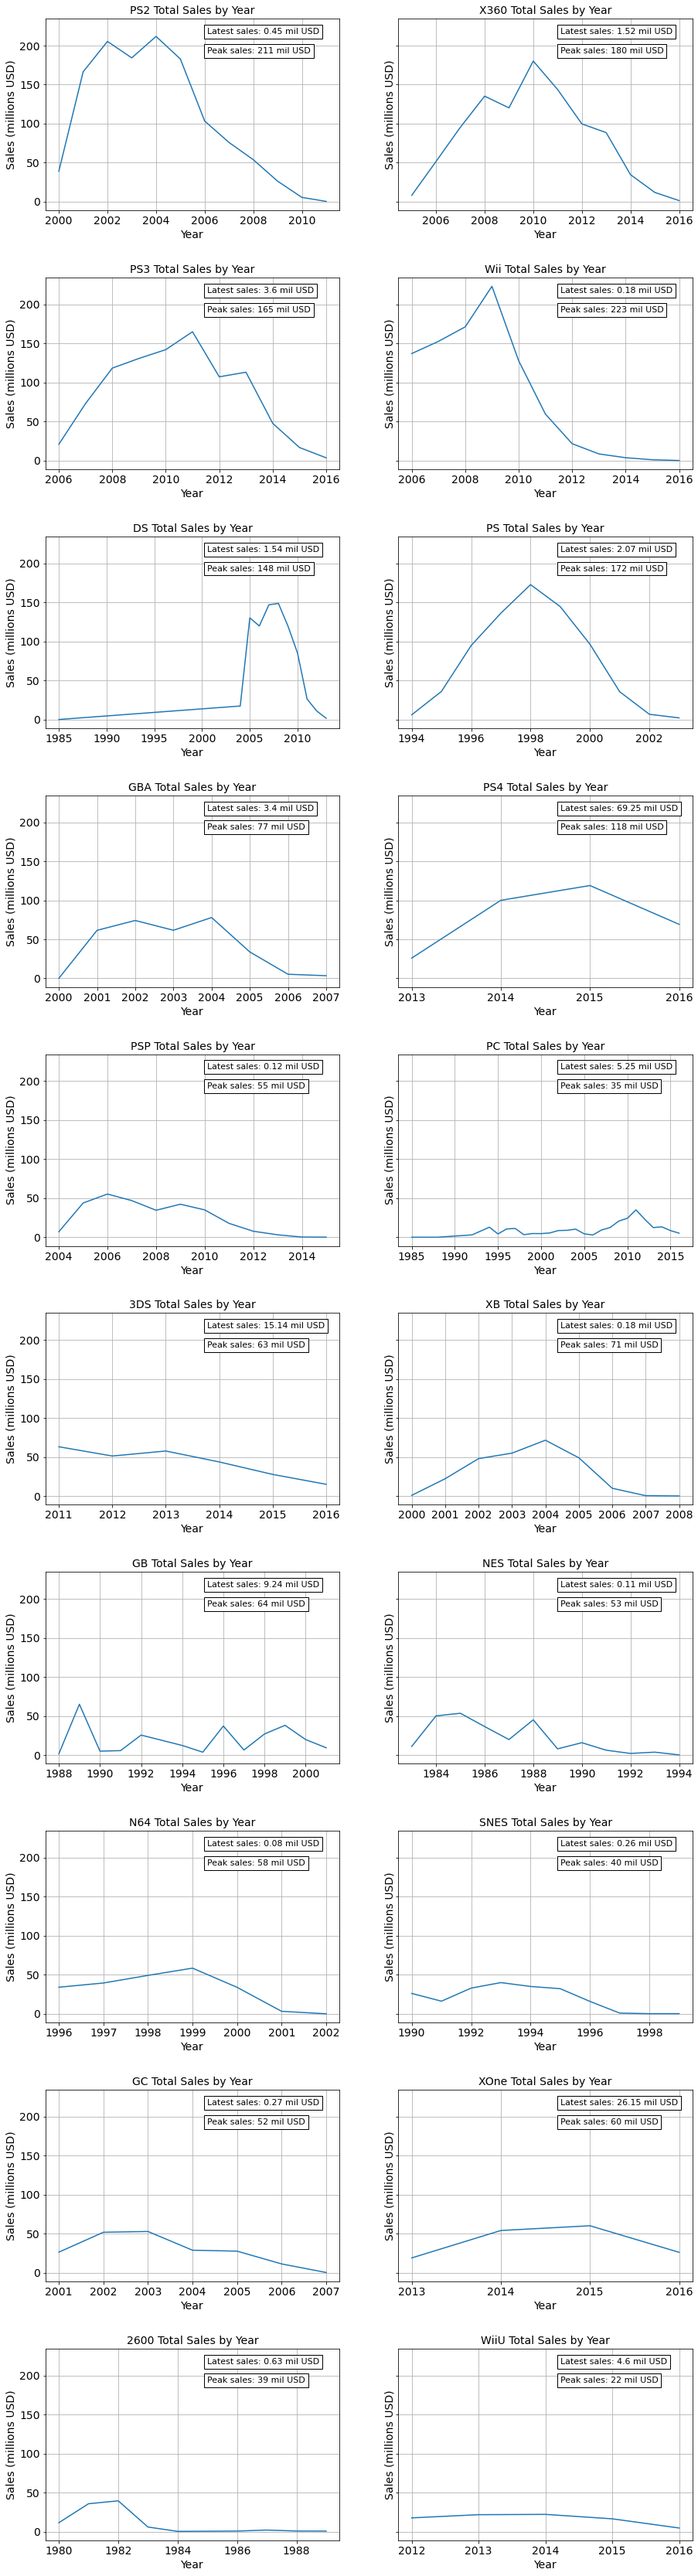

In [16]:
# distribution of sales per year for 20 most popular platforms of all time

fig, axes = plt.subplots(10, 2, figsize=(15, 60), sharey=True)

plt.subplots_adjust(hspace=0.35)
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)

axes = axes.reshape(-1)
bbox = dict(facecolor='white', edgecolor='black')

for i, platform in enumerate(top_platforms_total_sales.index[0:20]):
    
    latest_sales = data[data.platform == platform].groupby('year_of_release')['all_sales'].sum().iloc[-1]
    peak_sales = data[data.platform == platform].groupby('year_of_release')['all_sales'].sum().max()
    
    axes[i].plot(data[data.platform == platform].groupby('year_of_release')['all_sales'].sum())
    axes[i].set_title(platform + ' Total Sales by Year', fontsize=14)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Sales (millions USD)')
    axes[i].grid(True)
    axes[i].annotate(xy=(0.55, 0.92),
                     text='Latest sales: ' + str(latest_sales.round(2)) + ' mil USD',
                     xycoords='axes fraction',
                     bbox=bbox,
                     fontsize=11
                    )
    axes[i].annotate(xy=(0.55, 0.82),
                     text='Peak sales: ' + str(int(peak_sales)) + ' mil USD',
                     xycoords='axes fraction',
                     bbox=bbox,
                     fontsize=11
                    )

axes[7].set_xticks(range(2013, 2017))
axes[17].set_xticks(range(2013, 2017))
axes[19].set_xticks(range(2012, 2017))

plt.show()

##### Conclusion <a name="step_3_2_1">
Sales for platforms rise and fall throughout the years. What's popular today may not be popular in 10 years. There are a fair number of platforms that were extremely popular, but as they were superceded by newer platforms, their sales dropped to nearly zero. In general, these boom and bust cycles seem to last roughly **8-10 years** from the initial launch of the platform to the time when sales bottom out. Sales generally peak **3-5 years** after the platform is released. The following platforms display this "boom and bust" behavior when it comes to sales:
 - Nintendo GameCube (GC)
 - Nintendo (NES)
 - Super Nintendo (SNES)
 - Nintendo 64 (N64)
 - Xbox (XB)
 - PlayStation Portable (PSP)
 - Nintendo Wii (Wii)
 - PlayStation 2 (PS2)
 - Atari 2600 (2600)

#### Identifying relevant platforms <a name="step_3_3">

In order to make an accurate forecast, our best bet is to look at the data for the past year. We need to look at which platforms are still relevant by identifying those with the highest sales for 2016. Then, we can plot the recent sales trends for our top platforms, going back 4 years for each.

In [17]:
# create DataFrame with the most recent year the platform released a title and the total sales for that year

relevant_plats_dict = {'platform':[], 'latest_sales':[], 'latest_year':[]}

for platform in top_platforms_total_sales.index:
    latest_sales = data[data.platform == platform].groupby('year_of_release')['all_sales'].sum().iloc[-1].round(2)
    latest_year = data[data.platform == platform].groupby('year_of_release')['all_sales'].sum().index.max()
    
    relevant_plats_dict['platform'].append(platform)
    relevant_plats_dict['latest_sales'].append(latest_sales)
    relevant_plats_dict['latest_year'].append(latest_year)
    

relevant_plats = pd.DataFrame.from_dict(relevant_plats_dict)
relevant_plats.sort_values(by=['latest_sales', 'latest_year'], ascending=False).query('latest_year == 2016')

,platform,latest_sales,latest_year
7,PS4,69.25,2016
17,XOne,26.15,2016
10,3DS,15.14,2016
9,PC,5.25,2016
19,WiiU,4.60,2016
20,PSV,4.25,2016
2,PS3,3.60,2016
1,X360,1.52,2016
3,Wii,0.18,2016


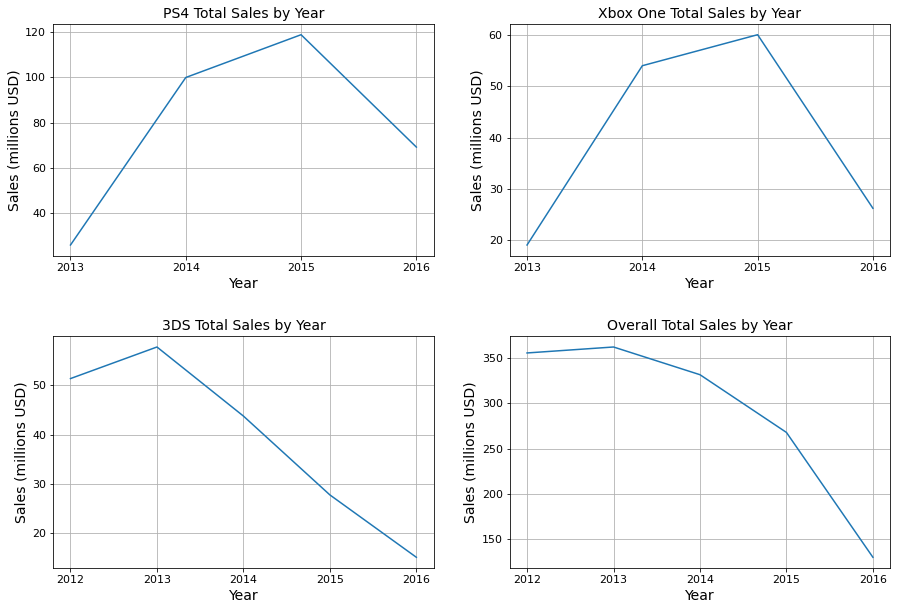

In [18]:
# plot last 3-4 years of sales for top platforms & overall market

fig, axes = plt.subplots(2, 2, figsize=(15,10))

plt.subplots_adjust(hspace=0.35)
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)

axes = axes.reshape(-1)

ps4_recent_trend = data.query('platform == "PS4"').query('year_of_release >= 2012')
xone_recent_trend = data.query('platform == "XOne"').query('year_of_release >= 2012')
nin3ds_recent_trend = data.query('platform == "3DS"').query('year_of_release >= 2012')

overall_recent_trend = data.query('year_of_release >= 2012').groupby('year_of_release')['all_sales'].sum()


axes[0].plot(ps4_recent_trend.groupby('year_of_release')['all_sales'].sum())
axes[0].set_title('PS4 Total Sales by Year', fontsize=14)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Sales (millions USD)')
axes[0].grid(True)
axes[0].set_xticks(range(2013, 2017))

axes[1].plot(xone_recent_trend.groupby('year_of_release')['all_sales'].sum())
axes[1].set_title('Xbox One Total Sales by Year', fontsize=14)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales (millions USD)')
axes[1].grid(True)
axes[1].set_xticks(range(2013, 2017))

axes[2].plot(nin3ds_recent_trend.groupby('year_of_release')['all_sales'].sum())
axes[2].set_title('3DS Total Sales by Year', fontsize=14)
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Sales (millions USD)')
axes[2].grid(True)
axes[2].set_xticks(range(2012, 2017))

axes[3].plot(overall_recent_trend)
axes[3].set_title('Overall Total Sales by Year', fontsize=14)
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Sales (millions USD)')
axes[3].grid(True)
axes[3].set_xticks(range(2012, 2017))

plt.show()

##### Conclusion <a name="step_3_3_1">


After looking at the most recent years and sales for these years for the top 3 platforms and overall market, we can get an idea of which platforms to target for 2017. Our top 3 are Sony PlayStation 4, Microsoft Xbox One, and Nintendo 3DS. While all 3 of these platforms have "peaked" in sales, it's safe to say that sales will remain strong for next year given how well they did in 2016. The market in general is also trending down, so the downward trend in these 3 platforms shouldn't be too worrying.

#### Boxplot of global sales by platform <a name="step_3_4">

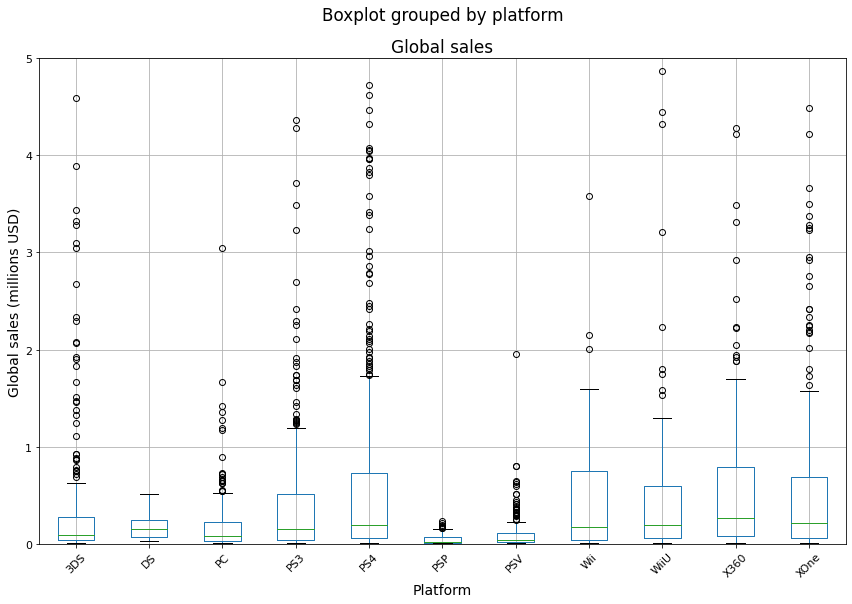

In [19]:
# plot boxplot of global sales grouped by platform, 2013-2016

data_past_2013 = data.query('year_of_release >= 2013')

ax = data_past_2013.boxplot(column='all_sales', by='platform', figsize=(14, 9), rot=45)

ax.set_title('Global sales')
ax.set_xlabel('Platform')
ax.set_ylabel('Global sales (millions USD)')

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

plt.ylim(0, 5)
plt.show()

In [20]:
# aggregated data for global platform sales, 2013-2016

global_sales_agg_data = data_past_2013.groupby('platform')['all_sales'].aggregate(['mean', 'median'])
global_sales_agg_data = global_sales_agg_data.sort_values(by='mean', ascending=False).reset_index()
global_sales_agg_data.round(2).transpose()

,0,1,2,3,4,5,6,7,8,9,10
platform,PS4,X360,XOne,Wii,WiiU,PS3,3DS,PC,DS,PSV,PSP
mean,0.8,0.74,0.65,0.59,0.56,0.53,0.46,0.21,0.19,0.09,0.05
median,0.2,0.26,0.22,0.18,0.2,0.15,0.09,0.08,0.15,0.04,0.02


##### Conclusion <a name="step_3_4_1">
Our box plot tells us there is quite a bit of variation in the global revenue brought in by each title for each platform. The minumums are relatively consistent across all platforms, which can be expected since every platform releases titles that flop once in a while.

The median sales for individual titles for PlayStation 4, WiiU, Xbox One, Xbox 360 and Nintendo 3DS are the highest. Some consistent performers were the PlayStation series, the Wii series, and the Xbox series.

Sony's mobile gaming platforms are the worst performers for the 2013-2016 time period, and should be avoided when targeting ads. It seems like we'd be better of spending money on Nintendo's portable gaming platforms instead.

We can also see that the mean sales are always higher than the median sales for each platform. This tells us that there are a few titles for each platform that perform extraordinarily well and therefore introduce positive skew to the data.

#### Effects of reviews on Xbox One sales <a name="step_3_5">

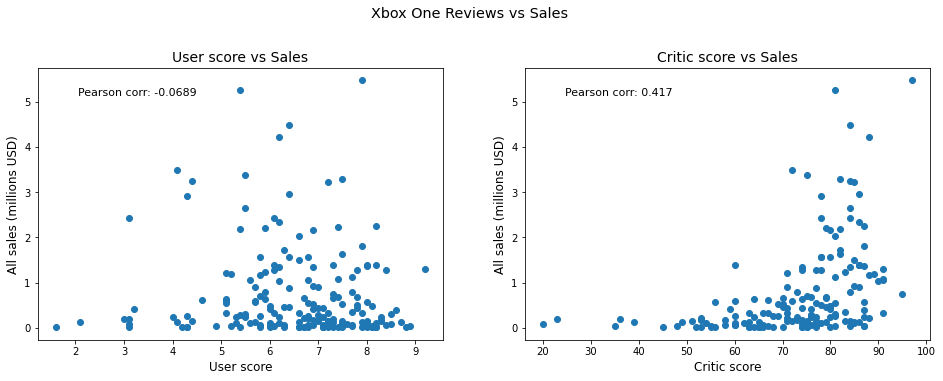

In [46]:
# plot scatterplots of user & critic scores vs sales for Xbox One, 2013-2016

xbox_one_user_data = data_past_2013.query('platform == "XOne"').query('user_score >= 0')
xbox_one_critic_data = data_past_2013.query('platform == "XOne"').query('critic_score >= 0')

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Xbox One Reviews vs Sales', y=1.05)
axes = axes.reshape(-1)

axes[0].scatter(x=xbox_one_user_data['user_score'], y=xbox_one_user_data['all_sales'])
axes[0].set_title('User score vs Sales', fontsize=14)
axes[0].set_ylabel('All sales (millions USD)', fontsize=12)
axes[0].set_xlabel('User score', fontsize=12)
axes[0].annotate(xy=(0.1, 0.9),
                 text='Pearson corr: ' + str(xbox_one_user_data['all_sales'].corr(xbox_one_user_data['user_score']).round(4)),
                 xycoords='axes fraction',
                 fontsize=11
                )

axes[1].scatter(x=xbox_one_critic_data['critic_score'], y=xbox_one_critic_data['all_sales'])
axes[1].set_title('Critic score vs Sales', fontsize=14)
axes[1].set_ylabel('All sales (millions USD)', fontsize=12)
axes[1].set_xlabel('Critic score', fontsize=12)
axes[1].annotate(xy=(0.1, 0.9),
                 text='Pearson corr: ' + str(xbox_one_critic_data['all_sales'].corr(xbox_one_critic_data['critic_score']).round(4)),
                 xycoords='axes fraction',
                 fontsize=11
                )

plt.show()

##### Conclusion <a name="step_3_5_1">
It's always a good idea to look at correlations between two sets of data. Here, we plotted reviews against overall global sales for Xbox One titles to see if there was anything meaningful in the data.

The Pearson correlation coefficient is a value from -1 to 1 that tells us whether two sets of data are correlated or not. Values close to -1 mean that there is a negative correlation (increase in one variable leads to decrease in the other). Values close to 1 mean that there is a positive correlation (increase in one variable leads to increase in the other). Values close to zero mean there is no correlation. The two variables have no effect on eachother.

For our user scores plot, we got a Pearson correlation factor of -0.069. This is very close to zero, meaning a very weak correlation between user scores and sales for Xbox One titles. User ratings don't seem to effect sales.

For our critic scores plot, we got a Pearson correlation factor of 0.42. This is a moderately high positive correlation, meaning critic scores moderately influence sales for Xbox One titles. Higher critic scores and higher sales for Xbox One titles go hand in hand.

#### Xbox One title sales vs other platforms <a name="step_3_6">

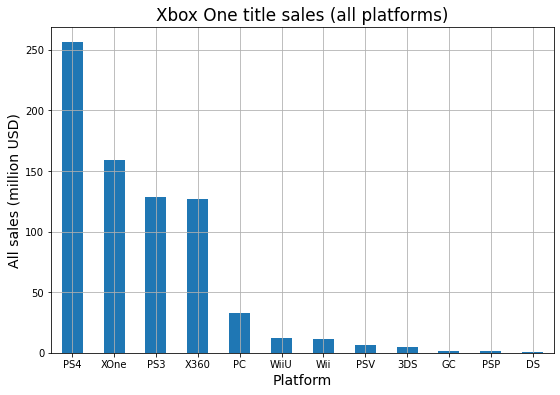

In [22]:
# group Xbox One titles by platform & sum all sales

xone_titles = data.query('platform == "XOne"')['name'].unique()
xone_title_sales_by_plat = data[data['name'].isin(xone_titles)].groupby('platform')['all_sales'].sum()
xone_title_sales_by_plat = xone_title_sales_by_plat.sort_values(ascending=False)

xone_title_sales_by_plat.plot(kind='bar',
                              title='Xbox One title sales (all platforms)',
                              xlabel='Platform',
                              ylabel = 'All sales (million USD)',
                              grid=True,
                              rot=0,
                              figsize=(9, 6))

plt.show()

##### Conclusion <a name="step_3_6_1">
PlayStation 4 actually sold more of the same titles that were released on Xbox One! Playstation 3 and Xbox 360 followed closely behind, each with roughly $125 million in total sales for all Xbox One titles. It seems like the highest sales for these titles are between the biggest platforms (PlayStation and Xbox) and their previous generation consoles.

#### Grouping sales by genre <a name="step_3_7">

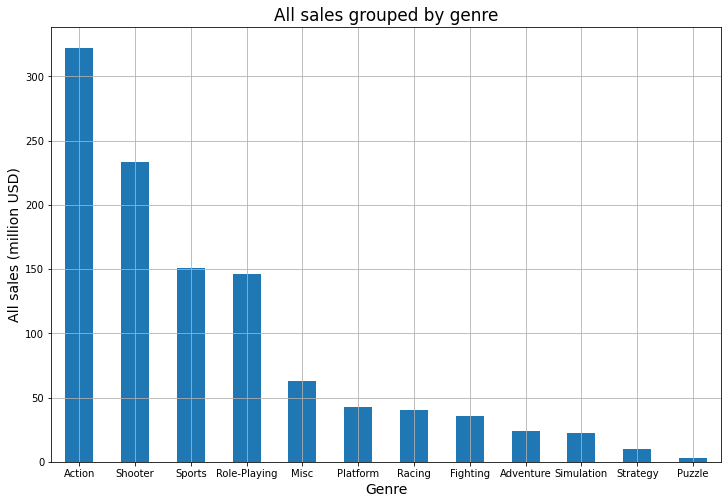

In [23]:
# group & sum all sales by genre, 2013-2016

sales_by_genre = data_past_2013.groupby('genre')['all_sales'].sum()
sales_by_genre = sales_by_genre.sort_values(ascending=False)


sales_by_genre.plot(kind='bar',
                    title='All sales grouped by genre',
                    xlabel='Genre',
                    ylabel = 'All sales (million USD)',
                    grid=True,
                    rot=0,
                    figsize=(12, 8))

plt.show()

##### Conclusion <a name="step_3_7_1">
Action, sports, shooters, and RPGs all performed very well overall between 2013 and 2016. We can expect that trend to continue into the future. We should probably focus less on strategy, adventure, simulation, and puzzle games since these games had the lowest sales of any genere. 

### Step 4: Create a user profile for each region <a name="step_4">
For each of the 3 regions, we'll determine:
- the top 5 platforms 
- the top 5 genres
- the effect of ESRB ratings on sales

#### Regional top 5 platforms <a name="step_4_1">

In [24]:
# sales by platform for each region, 2013-2016

top_platforms_na_sales = data_past_2013.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
top_platforms_eu_sales = data_past_2013.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
top_platforms_jp_sales = data_past_2013.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

In [25]:
top_platforms_na_sales.head()

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      39.04
Name: na_sales, dtype: float64

In [26]:
top_platforms_eu_sales.head()

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      31.17
Name: eu_sales, dtype: float64

In [27]:
top_platforms_jp_sales.head()

platform
3DS     67.86
PS3     23.35
PSV     18.66
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

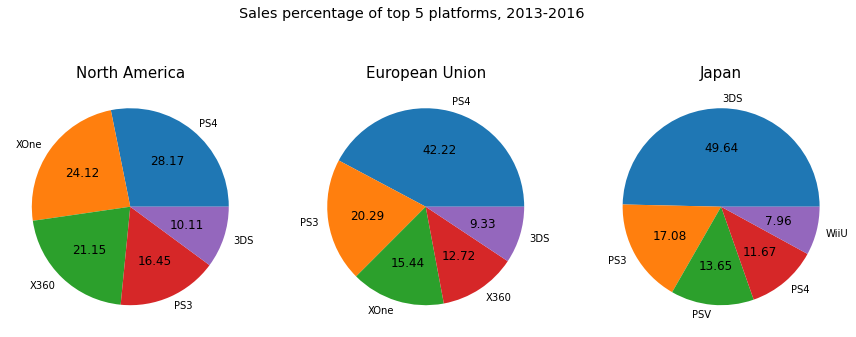

In [28]:
# pie charts for sales by platform

plt.rcParams['font.size'] = 12

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Sales percentage of top 5 platforms, 2013-2016', y=.85)
axes = axes.reshape(-1)



axes[0].pie(top_platforms_na_sales.head(), labels=top_platforms_na_sales.head().index, autopct='%.2f')
axes[0].set_title('North America', fontsize=15)

axes[1].pie(top_platforms_eu_sales.head(), labels=top_platforms_eu_sales.head().index, autopct='%.2f')
axes[1].set_title('European Union', fontsize=15)

axes[2].pie(top_platforms_jp_sales.head(), labels=top_platforms_jp_sales.head().index, autopct='%.2f')
axes[2].set_title('Japan', fontsize=15)

plt.show()

#### Conclusion <a name="step_4_1_1">
The most popular platforms vary significantly by region. The top 5 platforms for Japanese gamers are all from the Japanese companies Sony and Nintendo. Even so, their share of these markets in other regions is still much smaller, with the exception of Nintendo 3DS.

For example, PlayStaion 4, a top 5 console for all 3 regions, had total sales of nearly $266 million between 2013 and 2016. U.S. gamers accounted for 41% of that share, while EU gamers accounted for 53%. Even though Sony is a Japanese company, Japanese gamers only accounted for the remaining 6% of the remaing PS4 sales.

Conversely, Japanese sales for the Nintendo 3DS were about twice that of the other two regions. Japan alone accounted for nearly 50% of all 3DS sales between 2013 and 2016. Putting more emphasis on 3DS games in Japanese stores seems to be a good move.

#### Regional top 5 genres <a name="step_4_2">

In [29]:
# sales by genre for each region, 2013-2016

top_genres_na_sales = data_past_2013.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
top_genres_eu_sales = data_past_2013.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top_genres_jp_sales = data_past_2013.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

In [30]:
top_genres_na_sales.head()

genre
Action          126.23
Shooter         109.78
Sports           65.27
Role-Playing     46.51
Misc             27.49
Name: na_sales, dtype: float64

In [31]:
top_genres_eu_sales.head()

genre
Action          118.32
Shooter          87.88
Sports           60.52
Role-Playing     37.02
Racing           20.19
Name: eu_sales, dtype: float64

In [32]:
top_genres_jp_sales.head()

genre
Role-Playing    51.14
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

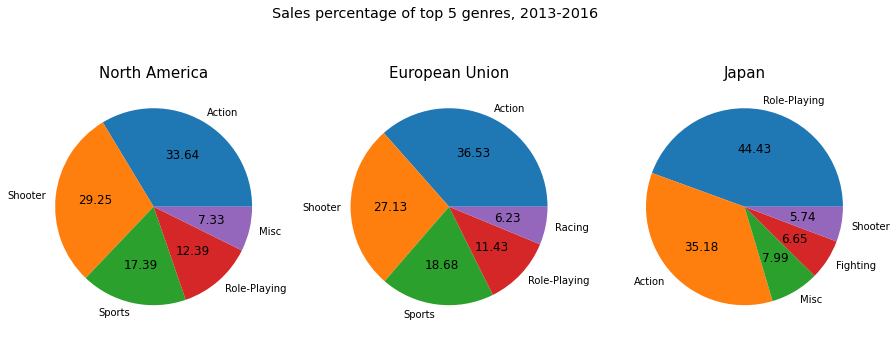

In [33]:
# pie charts for sales by genre

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Sales percentage of top 5 genres, 2013-2016', y=.85)
axes = axes.reshape(-1)


axes[0].pie(top_genres_na_sales.head(), labels=top_genres_na_sales.head().index, autopct='%.2f')
axes[0].set_title('North America', fontsize=15)

axes[1].pie(top_genres_eu_sales.head(), labels=top_genres_eu_sales.head().index, autopct='%.2f')
axes[1].set_title('European Union', fontsize=15)

axes[2].pie(top_genres_jp_sales.head(), labels=top_genres_jp_sales.head().index, autopct='%.2f')
axes[2].set_title('Japan', fontsize=15)

plt.show()

##### Conclusion <a name="step_4_2_1">
Sales for action games between 2013 and 2016 were strong in all 3 regions, being top sellers in North America and Europe and the second-best sellers in Japan. RPGs were also strong sellers, taking the top spot in Japan and within top 5 for the other two regions. Racing games seem to be more popular in Europe. Europe and North America have very similar profiles, sharing the same exact top 4 genres when it comes to sales. Shooters also performed well in all 3 regions. Ideally, we'd use this data to split up advertising campaigns based on each region.

#### Effects of ESRB rating on sales <a name="step_4_3">

In [34]:
# sales by ESRB rating for each region, 2013-2016

top_ratings_na_sales = data_past_2013.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
top_ratings_eu_sales = data_past_2013.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
top_ratings_jp_sales = data_past_2013.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

In [35]:
top_ratings_na_sales.head()

rating
M       165.21
N/A      89.70
E        79.17
E10+     54.50
T        50.08
Name: na_sales, dtype: float64

In [36]:
top_ratings_na_sales.head()

rating
M       165.21
N/A      89.70
E        79.17
E10+     54.50
T        50.08
Name: na_sales, dtype: float64

In [37]:
top_ratings_eu_sales.head()

rating
M       145.32
E        83.38
N/A      78.91
E10+     42.88
T        42.00
Name: eu_sales, dtype: float64

In [38]:
top_ratings_jp_sales.head()

rating
N/A     85.10
T       20.66
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

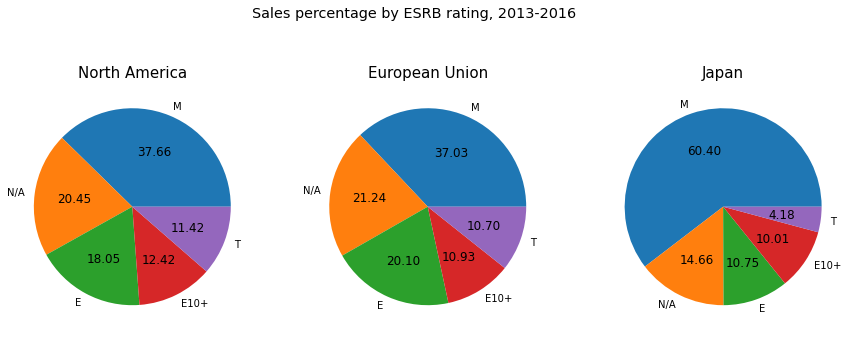

In [39]:
# pie charts for sales by ESRB rating

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Sales percentage by ESRB rating, 2013-2016', y=.85)
axes = axes.reshape(-1)


axes[0].pie(top_ratings_na_sales, labels=top_ratings_na_sales.index, autopct='%.2f')
axes[0].set_title('North America', fontsize=15)

axes[1].pie(top_ratings_eu_sales, labels=top_ratings_na_sales.index, autopct='%.2f')
axes[1].set_title('European Union', fontsize=15)

axes[2].pie(top_ratings_jp_sales, labels=top_ratings_na_sales.index, autopct='%.2f')
axes[2].set_title('Japan', fontsize=15)

plt.show()

##### Conclusion <a name="step_4_3_1">
Mature games dominate the market in North America and Europe. In Japan, the spread is more evenly distributed between ratings. 47% of the top 5 sales in North America between 2013 and 2016 came from Mature games. In Europe, this percentage was roughly the same, at 46%. In Japan, Mature games only accounted for 37% of top 5 sales for the same time period.

It's also worth pointing out that the distributions for Europe and North America are almost identical. If we're running ads based on ESRB ratings, the shares of each type of game should be the same for both regions.

### Step 5: Hypothesis testing <a name="step_5">

Next, we'll test the follwing hypotheses:
- Average user ratings for the Xbox One and PC platforms are the same
- Average user ratings for the action and sports genres are different

#### Average user ratings for Xbox One & PC  are the same <a name="step_5_1">

In [40]:
# get Xbox One user rating stats

xone_user_ratings = data.query('platform == "XOne"').query('user_score >= 0')['user_score']
xone_user_ratings_stats = xone_user_ratings.aggregate(['mean', 'median', 'var', 'std'])
xone_user_ratings_stats

mean      6.521429
median    6.800000
var       1.906997
std       1.380941
Name: user_score, dtype: float64

In [41]:
# get PC user rating stats

pc_user_ratings = data.query('platform == "PC"').query('user_score >= 0')['user_score']
pc_user_ratings_stats = pc_user_ratings.aggregate(['mean', 'median', 'var', 'std'])
pc_user_ratings_stats

mean      7.062468
median    7.500000
var       2.340787
std       1.529963
Name: user_score, dtype: float64

In [42]:
# run p-test

print('Xbox One user score variance: {:.2f}'.format(xone_user_ratings_stats.loc['var']))
print('PC user score variance: {:.2f}\n'.format(pc_user_ratings_stats.loc['var']))

results = st.ttest_ind(xone_user_ratings, pc_user_ratings , equal_var=True)

alpha = 0.05

print('Null hypothesis:\n   The average user score between Xbox One & PC titles is the same\n')
print('Alternative hypothesis:\n   The user score is greater for PC titles than the average user score for the Xbox One titles\n')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Xbox One user score variance: 1.91
PC user score variance: 2.34

Null hypothesis:
   The average user score between Xbox One & PC titles is the same

Alternative hypothesis:
   The user score is greater for PC titles than the average user score for the Xbox One titles

p-value:  1.3896435533548819e-05
We reject the null hypothesis


##### Conclusion <a name="step_5_1_1">
After calculating means for both PC and Xbox One user scores, we formed the null hypothesis that these averages were the same. To determine whether or not this is due to randomness, we can perform a p-test. Variances between user scores for PC and Xbox One are pretty close, so for our p-test, we can assume equal variance.

The p-value for our p-test fell well below our critical statistical significance value of 0.05, meaning we can reject the null hypothesis in favor of the alternative hypothesis. This means that the difference in average user scores between PC and Xbox One titles is not due to randomness. PC games do generally get better ratings from users. It makes sense to allocate more advertising resources towards PC games.

#### Average user ratings for action & sports titles are different <a name="step_5_2">

In [43]:
# get action game user rating stats

action_user_ratings = data.query('genre == "Action"').query('user_score >= 0')['user_score']
action_user_ratings_stats = action_user_ratings.aggregate(['mean', 'median', 'var', 'std'])
action_user_ratings_stats

mean      7.054044
median    7.400000
var       2.031747
std       1.425394
Name: user_score, dtype: float64

In [44]:
# get sports game user rating stats

sports_user_ratings = data.query('genre == "Sports"').query('user_score >= 0')['user_score']
sports_user_ratings_stats = sports_user_ratings.aggregate(['mean', 'median', 'var', 'std'])
sports_user_ratings_stats

mean      6.961197
median    7.400000
var       2.596515
std       1.611370
Name: user_score, dtype: float64

In [45]:
# run p-test

print('Action game user score variance: {:.2f}'.format(action_user_ratings_stats.loc['var']))
print('Sports game user score variance: {:.2f}\n'.format(sports_user_ratings_stats.loc['var']))

results = st.ttest_ind(action_user_ratings, sports_user_ratings, equal_var=True)

alpha = 0.05

print('Null hypothesis:\n   The average user score between action & sports titles is the same\n')
print('Alternative hypothesis:\n   The average user score between action & sports titles is different\n')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Action game user score variance: 2.03
Sports game user score variance: 2.60

Null hypothesis:
   The average user score between action & sports titles is the same

Alternative hypothesis:
   The average user score between action & sports titles is different

p-value:  0.10406951359049141
We can't reject the null hypothesis


##### Conclusion <a name="step_5_2_1">

After calculating means for both action and sports game user scores, we formed the null hypothesis that these averages were the same. To determine whether or not this is due to randomness, we can perform a p-test. Variances between user scores for action and sports games are pretty close, so for our p-test, we can assume equal variance.

The p-value for our p-test fell above our critical statistical significance value of 0.05, meaning we can't reject the null hypothesis in favor of the alternative hypothesis. This means that the nearly-equal average user scores between sports games and action games is not due to randomness. Gamers really do like action and sports games equally. It makes sense to target these games in equal proportions for our advertising campaigns.

### Step 6: General conclusion <a name="step_6">

#### Full project overview <a name="step_6_1">

##### Step 1: Open data file & study the general info

After our initial overview of the data, we can see there are a few problems that we should fix before proceeding.
- Column names contain uppercase characters. Best-practice guidelines dictate that these should all be changed to lowercase
- There are missing values in the **name**, **year_of_release**, **genre**, **critic_score**, **user_score**, and **rating** columns. We need to attempt to find out why these are missing, and decide whether or not to fill them in.
- **user_score** has non-numeric values labeled "tbd" which is an abbreviation for to "be determined". We need to address these.
- **year_of_release** should be changed to the *int64* data type in case we need to perform mathematical operations on the column further into the analysis
- **user_score** should be changed to the *float64* data type instead of *object* for the same reason as above

##### Step 2: Data preprocessing
In this step, we achieved the following in order to prepare our raw data for an accurate and clean analysis:
- Column names changed to lowercase
- Dropped the two rows with missing name & genre data
- Replaced missing release year data with averages for each platform
- Filled "tbd" in the **user_score** column with NaN
- Changed user score data to float
- Changed **year_of_release** data to int64
- Added all sales together in new column
- Reorder **all_sales** columns

##### Step 3: Analyze the data 
Let's recap our analysis:
- We plotted a graph of number of releases per year and found that this value peaked in 2008-2009. It has since declined to moderate levels. It looks like there weren't many releases prior to 1993, either.
- We ound the top 10 platforms by total sales from 1980 to 2016.
- We plotted sales for top 20 platforms from 1980 to 2016 and discovered that platform sales peak 3-5 years after their initial release. Many platforms eventually sink to very low sales as their popularity wanes.
- We identified the most relevant platforms by finding those with the highest sales for 2016. They were PlayStation 4, Xbox One, and Nintendo 3DS. This is the first useful piece of information for targeting ads in 2017.
- We plotted boxplot of global sales grouped by platform for 2013-2016. Strong performers were PlayStation 4, WiiU, Xbox One, Xbox 360 and Nintendo 3DS. Sony's mobile gaming platforms performed poorly for this time period.
- We plotted scatterplots of user and critic scores vs sales for Xbox One and found that critic scores had a higher impact on sales than user scores with a moderately positive correlation.
- We group Xbox One titles by platform and created a bar chart of the sums. PlayStation 4 actually sold more of the titles that were released on Xbox One.
- We grouped all sales by genre and created a bar chart of sums for 2013 to 2016. Action, sports, shooters, and RPGs all performed very well overall.

##### Step 4: Create a user profile for each region
Here, we looked at data separated by region. Our 3 regions were North America, the European Union, and Japan.
- We looked at sales by platform for each region and determined that Japanese gamers account for a smaller share of the top 5 platforms, with the exception of Nintendo 3DS.
- We looked at sales by genre for each region, and determined that sales for action games between 2013 and 2016 were strong in all 3 regions, being top sellers in North America and Europe and the second-best sellers in Japan. Europe and North America have very similar profiles, sharing the same exact top 4 genres when it comes to sales.
- We looked at sales by ESRB rating for each region and determined that Mature games dominate the market in North America and Europe. In Japan, the spread is more evenly distributed between ratings. The distributions for Europe and North America are almost identical.

##### Step 5: Hypothesis testing

Finally, we tested the follwing hypotheses:
- Average user ratings for the Xbox One and PC platforms are the same. We found that the difference in average user scores between PC and Xbox One titles is not due to randomness. PC games do generally get better ratings from users. The average user score for Xbox One games is 6.52 while the average for PC games is 7.06.
- Average user ratings for the action and sports genres are different. We found that the nearly-equal average user scores between sports games and action games is not due to randomness. Gamers really do like action and sports games equally. The average user score for action games was 7.05 while the average for sports games was 6.96.

#### Recommendations  & suggestions <a name="step_6_2">

Sales and title releases are forecasted to remain moderately strong in the near term. We should target PlayStation 4, Xbox One, and Nintendo 3DS titles for ad campaigns, with an empahasis on 3DS titles in the Japanese gaming market. Crtically-acclaimed titles for 2016 and 2017 should also receive greater marketing emphasis. Action, sports, shooters, and RPGs all performed very well across all 3 regions and are expected to do so in 2017. Mature-rated games should also be targeted in the North American and European markets.